Code based on (https://blog.keras.io/building-autoencoders-in-keras.html) By [Francois Chollet](https://twitter.com/fchollet)
# Autoencoders


![autoencoder](https://www.compthree.com/images/blog/ae/ae.png)

Usually, they are used for extracting latent representations with a lower dimensionality than the input data -> data compression 

## Case: MNIST handwritten digits

### Dataset: 

Train images: 60,000

Test images: 10,000

Image size: 28x28 pixels

![dataset](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset_W640.jpg)
![image of a digit](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/Examples-from-the-MNIST-dataset.png)




In [1]:
# Import MNIST dataset

from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# labels
y_train

Using TensorFlow backend.


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [2]:
# show images
import matplotlib.pyplot as plt

def see_images(dataset, n):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(dataset[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

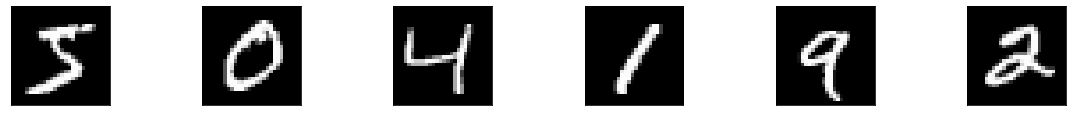

In [3]:
see_images(x_train, 6)

In [4]:
# We need to preprocess our data to use them as input in the network. 
# We normalise the images, each pixel within [0, 1] and format the images into a vector

x_train = x_train.astype('float32') / 255 # 255 max rgb value
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

input_dim = x_train.shape[1]
x_train.shape

(60000, 784)

### Simplest autoencoder
We will use a single fully-connected neural for our encoder and decoder.

Elements:

* Input layer: $y = xI$
* Fully-connected layer: $y = xA^T + b$
* Rectified Linear Unit function: $ReLu(x)=max(0, x)$ (encoder)
* Sigmoid function: $Sigmoid(x) = \sigma(x) = \frac{1}{1+exp(-x)}$ (decoder)

![autoencoder for MNIST](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

In [5]:
from keras.layers import Input, Dense
from keras.models import Model # (template for architecture)

# latent representations dimension
latent_dim = 32
# input layer
input_img = Input(shape=(input_dim, ))

# encoder
encoder = Dense(latent_dim, activation='relu')
encoder_feats = encoder(input_img)

# decoder
decoder = Dense(input_dim, activation='sigmoid')
decoder_out = decoder(encoder_feats)

# model
simple_autoencoder = Model(input_img, decoder_out)

In [6]:
encoder_model = Model(input_img, encoder_feats)
encoded_input = Input(shape=(latent_dim, ))
decoder_model = Model(encoded_input, decoder(encoded_input))

Before training the model, we need to set up the loss function and optimizer.

Loss function per-pixel crossentropy loss

$loss = -[y * log(y' + \epsilon) + (1-y) * log(1-y' + \epsilon)]$


In [7]:
simple_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
# Train model
simple_autoencoder.fit(x_train, x_train,  # the target is the same input data!
                       epochs=50, 
                       batch_size=256, 
                       shuffle=True, 
                       validation_data=(x_test, x_test)) 
"""
simple_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
"""

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3728 - val_loss: 0.2704
Epoch 2/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2617 - val_loss: 0.2496
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2400 - val_loss: 0.2283
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2211 - val_loss: 0.2116
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2070 - val_loss: 0.1996
Epoch 6/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1961 - val_loss: 0.1899
Epoch 7/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1874 - val_loss: 0.1822
Epoch 8/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1803 - val_loss: 0.1758
Epoch 9/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.1745 - val_loss: 0.1704
Epoch

'\nsimple_autoencoder.fit(x_train, x_train,\n                epochs=50,\n                batch_size=256,\n                shuffle=True,\n                validation_data=(x_test, x_test))\n'

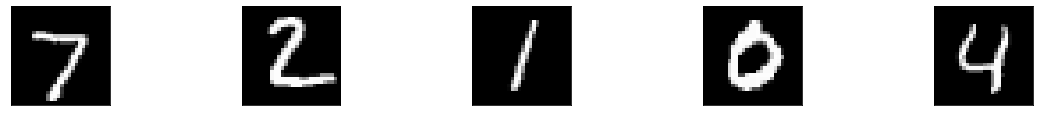

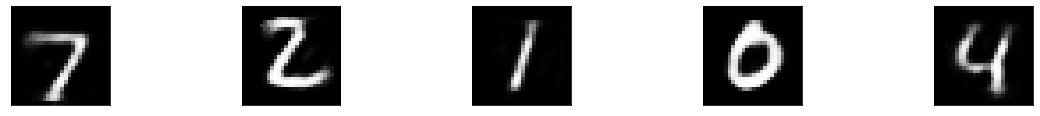

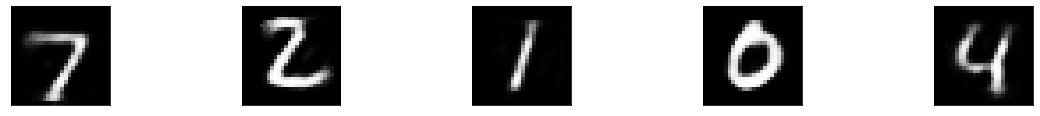

In [10]:
# Predict digits
prediction = simple_autoencoder.predict(x_test)

# Visualisation of predictions
see_images(x_test, 5)
see_images(prediction, 5)

# Using decoder and encoder model
encoded_imgs = encoder_model.predict(x_test)
decoded_imgs = decoder_model.predict(encoded_imgs)

see_images(decoded_imgs, 5)

In [11]:
# latent representations
encoded_imgs[0]

array([ 3.4168975,  9.73697  ,  4.0405474, -0.       ,  2.5260572,
        7.849966 ,  5.9144373,  2.6547973, -0.       ,  4.030358 ,
        7.923523 , 10.401867 , 10.825691 ,  6.086287 ,  5.351529 ,
        7.7557144,  3.1874466,  3.4728453, 12.695125 ,  5.8492384,
        2.665689 , -0.       ,  6.0242333,  3.8416348, 11.725248 ,
        8.529642 ,  8.372928 , 11.944905 , -0.       ,  4.4268446,
        4.178211 ,  7.6326623], dtype=float32)

### Varietional Autoencoder (VAE)

VAE is a generative model that learns the parameters of the probability distribution modelling the input data. 

"A VAE encodes data Y (e.g., a sentence) as hidden random variables Z, based on which the decoder reconstructs Y. Consider a generative model, parameterized by $\theta$, as"

$p_{\theta}(Z,Y) = p_{\theta}(Z)p_{\theta}(Y|Z)$ (Bahuleyan et al., 2018)

**Encoder**: it learns two parameters (`z_mean`, and `z_log_sigma`) in the latent space from the input data, and it randomly samples points from the latent normal distribution (`z = z_mean + exp(0.5 * z_log_sigma) * epsilon`).

**Decoder**: it maps the latent space points to the original input data


**Loss fuctions**: a VAE has two loss functions: the unimodal(reconstruction) loss as in the simple autoencoder and the KL divergence between the latent distribution (approximation, learned parameters) and the prior distribution (actual distribution of latent space ?) which works as a regulaser. 


In [12]:
# parameters
intermediate_dim = 512 # dimension of points in the latent space
batch_size = 128 
latent_dim = 2 # the two latent parameters z_mean and z_sigma

![architecture sequential VAE](img/VAE_arch.png)
(Kingma and Welling, 2014)

In [14]:
# architecture

inputs = Input(shape=(input_dim, ), name='encoder_input')

# encoder (x -> z_mean & x -> z_log_var)
encoder_1 = Dense(intermediate_dim, activation='relu')
encoder_out_1 = encoder_1(inputs)
z_mean = Dense(latent_dim, name='z_mean')
z_mean_out = z_mean(encoder_out_1)
z_log_sigma = Dense(latent_dim, name='z_log_sigma')
z_log_sigma_out = z_log_sigma(encoder_out_1)



In [15]:
# sampling
from keras import backend as K # operations with tensors

def sampling(params):
    z_mean, z_log_sigma = params
    epsilon = K.random_normal(shape=(batch_size, latent_dim)) # mean = 0, std = 1
    return z_mean + K.exp(0.5 * z_log_sigma) * epsilon #